In [2]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


In [3]:
# Read and select variables
# Rename columns

df_orig = pd.read_csv("supermarkets_data_enriched.csv")[['type', 'id', 'lat', 'lon', 'brand', 'shop', 'addr:city', 'addr:housenumber', 'addr:postcode', 'geometry', 'index_right', 'bfs_name', 'bfs_number', 'pop', 'pop_dens', 'frg_pct', 'emp']]

# Rename columns
df_orig = df_orig.rename(columns={
    'addr:city': 'city',
    'addr:housenumber': 'housenumber',
    'addr:postcode': 'postcode'
})


# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,type,id,lat,lon,brand,shop,city,housenumber,postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
6,node,7389830915,47.225056,8.970650,Denner,supermarket,Uznach,15,8730.0,POINT (8.9706499 47.2250563),1217,Uznach,3339,6489,860.610080,27.862537,3500.0
7,node,39947904,47.376732,8.542161,Coop,supermarket,Zürich,1,8001.0,POINT (8.5421608 47.3767316),77,Zürich,261,420217,4778.994655,32.458468,491193.0


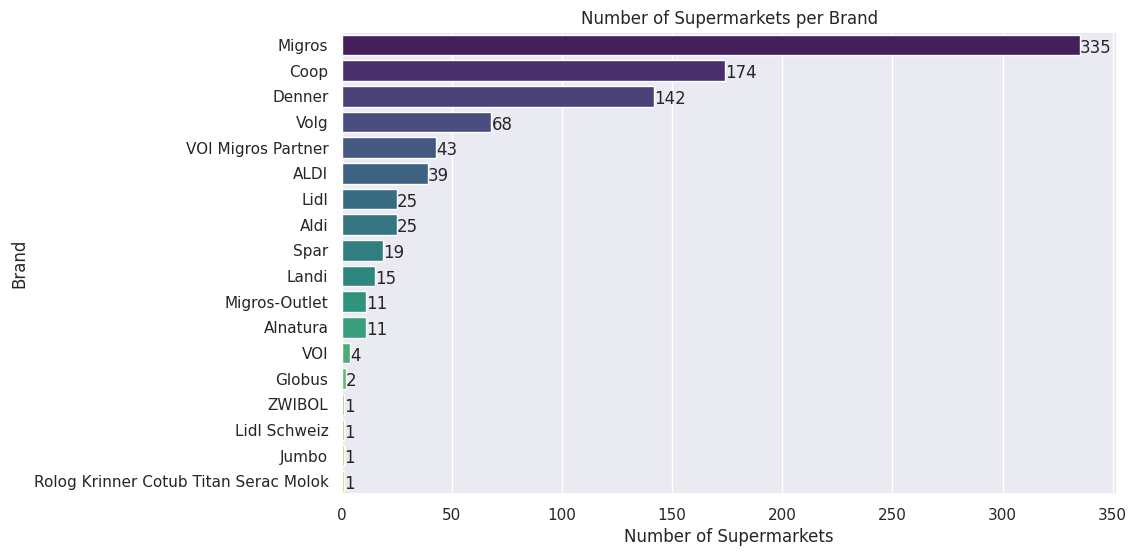

In [17]:
brand_counts = df_orig['brand'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.xlabel('Number of Supermarkets')
plt.ylabel('Brand')
plt.title('Number of Supermarkets per Brand')
for index, value in enumerate(brand_counts.values):
    plt.text(value, index + 0.1, str(value), va='center') # why +0.1 to center value, this is stupid...
plt.show()

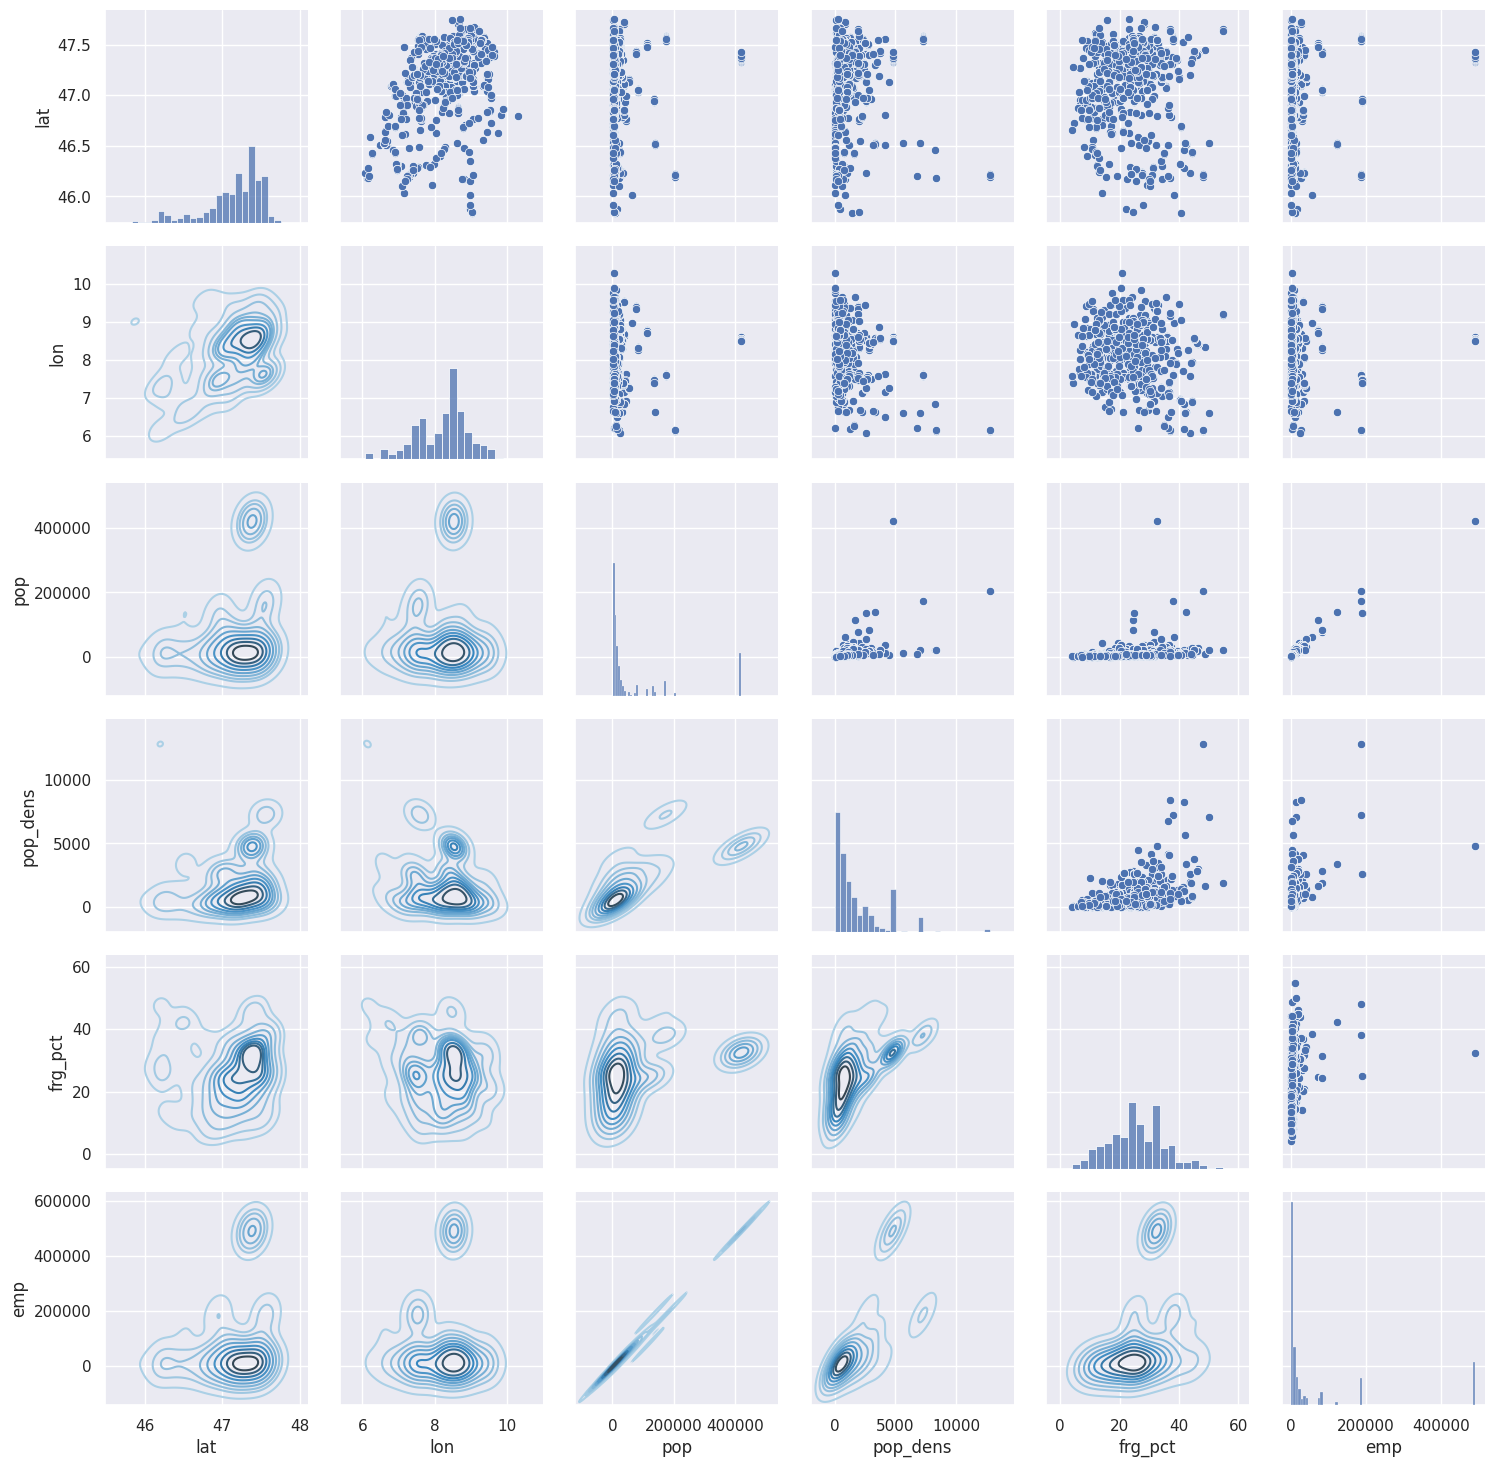

In [27]:

g = sns.PairGrid(df_orig[['lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']])
g = g.map_upper(sns.scatterplot)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.histplot, kde_kws={'color': 'r'})
plt.show()
#to be honest not 100% sure if that the idea of the exercise

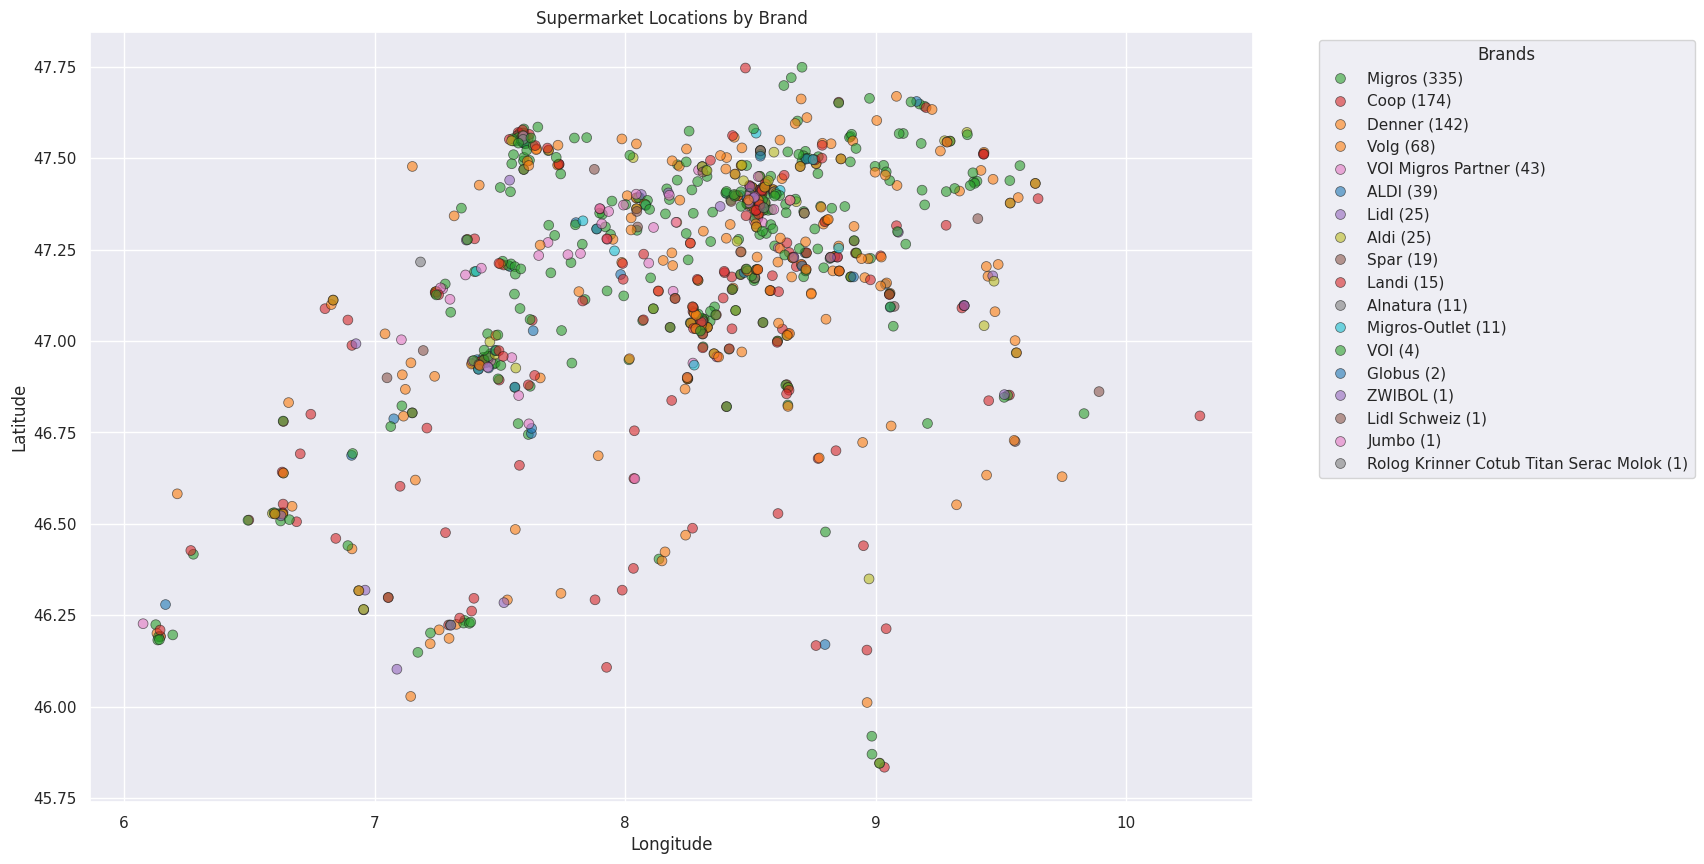

In [53]:



# Plot the locations of supermarkets with different colors according to their brand
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_orig, x='lon', y='lat', hue='brand', palette='tab10', s=50, alpha=0.6, edgecolor='k')
plt.title('Supermarket Locations by Brand')
plt.xlabel('Longitude')
plt.ylabel('Latitude')



handles, labels = plt.gca().get_legend_handles_labels()
sorted_handles, sorted_labels= zip(*sorted(zip(handles, [f'{label} ({brand_counts[label]})' for label in labels]), key=lambda x: int(x[1].split('(')[-1].split(')')[0]), reverse=True))
plt.legend(sorted_handles, sorted_labels, title='Brands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()